## 10/26/17 ##

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


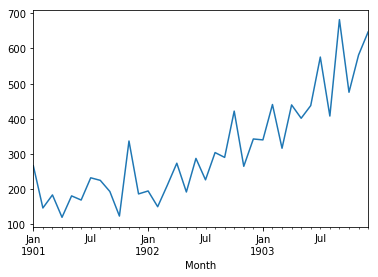

In [13]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from __future__ import print_function

from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt

def parser(x):
    return datetime.strptime('190'+str(x), '%Y-%m')

series = read_csv('./data/sales-of-shampoo.csv', header=0, parse_dates=[0], \
                  index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

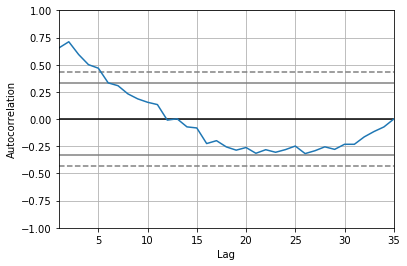

In [3]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

### ARIMA with Python

                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Thu, 26 Oct 2017   AIC                            406.340
Time:                                                 17:52:54   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

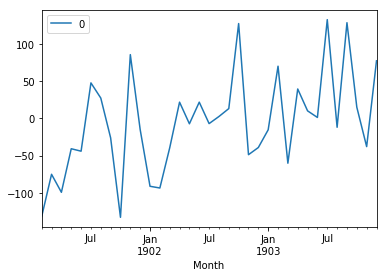

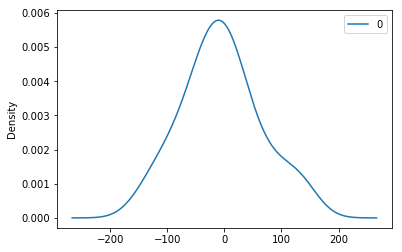

                0
count   35.000000
mean    -5.495206
std     68.132883
min   -133.296607
25%    -42.477885
50%     -7.186566
75%     24.748328
max    133.237940
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9608   1316.021      3.593      0.000    2149.607    7308.314


In [21]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

import statsmodels.api as sm

# fit model
model = ARIMA(series, order=(5,1,0))  ## order=(p, d, q)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())


## SARIMAX

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9608   1316.021      3.593      0.000    2149.607    7308.314


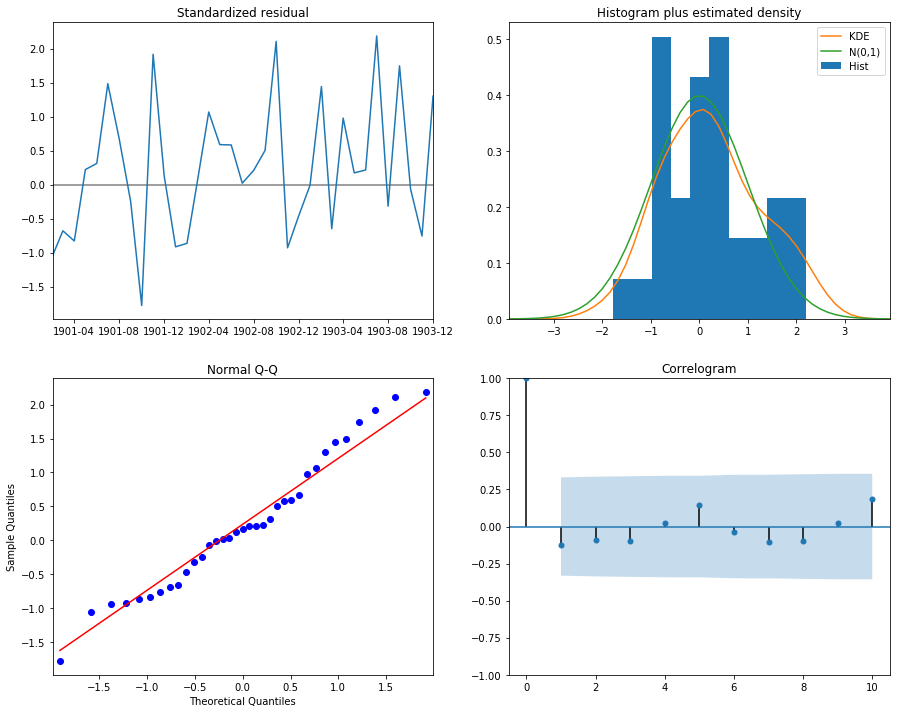

In [24]:

## https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
model_SARIMAX = sm.tsa.statespace.SARIMAX(series, order=(5,1,0))
model_SARIMAX_fit = model_SARIMAX.fit() 
print(model_SARIMAX_fit.summary().tables[1])

model_SARIMAX_fit.plot_diagnostics(figsize=(15, 12))
plt.show()


### Rolling Forecast ARIMA Model



predicted=349.117730, expected=342.300000
predicted=306.512995, expected=339.700000
predicted=387.376331, expected=440.400000
predicted=348.154113, expected=315.900000
predicted=386.308789, expected=439.300000
predicted=356.082062, expected=401.300000
predicted=446.379489, expected=437.400000
predicted=394.737301, expected=575.500000
predicted=434.915530, expected=407.600000
predicted=507.923441, expected=682.000000
predicted=435.482784, expected=475.300000
predicted=652.743824, expected=581.300000
predicted=546.343504, expected=646.900000
Test MSE: 6958.326


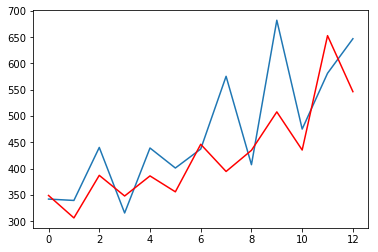

In [18]:
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('./data/sales-of-shampoo.csv', header=0, parse_dates=[0], \
                  index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0)) ## model in the for loop
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()